### Importing Modules and Reading CSV

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [8]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0


In [9]:
df.drop(columns='Time',axis=1,inplace=True)

In [10]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0


In [11]:
df.duplicated().any()

True

In [12]:
df = df.drop_duplicates()

In [13]:
import seaborn as sns

In [14]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

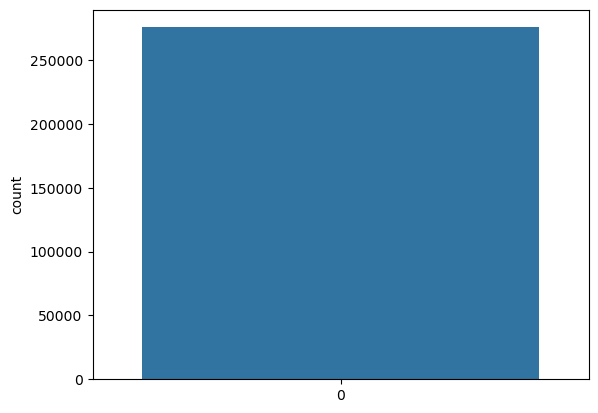

In [15]:
sns.countplot(df['Class']);

In [16]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [19]:
pred1 = log.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,pred1)

0.9992200678359603

In [22]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [23]:
precision_score(y_test,pred1)

0.8870967741935484

In [24]:
recall_score(y_test,pred1)

0.6043956043956044

In [25]:
f1_score(y_test,pred1)

0.718954248366013

### Undersampling

In [26]:
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [27]:
normal.shape

(275190, 30)

In [28]:
fraud.shape

(473, 30)

In [29]:
normal_sample = normal.sample(n = 473)

In [30]:
normal_sample.shape

(473, 30)

In [31]:
new_df = pd.concat([normal_sample,fraud],ignore_index=True)

In [32]:
new_df['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [33]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-3.326027,-1.890367,1.674941,1.148126,2.489155,2.134112,0.392665,-2.107003,2.624925,2.626096,...,0.305605,1.493433,-1.399336,-1.467364,-0.080785,-0.242289,-1.818504,-0.043981,0.122543,0
1,-4.686237,3.575598,-0.972205,-0.554534,-1.479000,-0.775610,-0.510762,1.357667,1.660292,2.926167,...,-0.471747,-0.779434,0.283185,-0.005168,0.299910,0.066382,0.139367,0.280479,-0.317287,0
2,-0.851400,1.270581,1.620549,-0.028974,-0.163607,-0.722942,0.679530,-0.027105,-0.267548,0.041243,...,-0.173419,-0.356498,0.083050,0.599853,-0.277701,0.057846,0.259451,0.186026,-0.314408,0
3,-0.250332,1.150777,0.926263,0.662830,0.544385,-0.278080,0.794583,-0.164389,-0.562977,-0.111347,...,0.119066,0.369282,-0.284494,-0.432816,-0.155560,-0.296539,0.041793,0.151934,-0.333239,0
4,-1.493749,1.965395,0.347797,0.039396,-0.675706,-1.112975,0.006869,0.782827,-0.391162,-0.353277,...,-0.238504,-0.737631,0.093783,0.328945,-0.003993,0.084781,0.217509,0.081521,-0.315567,0


In [34]:
X_ = new_df.drop('Class',axis = 1)
y_ = new_df['Class']

In [35]:
Xu_train,Xu_test,yu_train,yu_test=train_test_split(X_,y_,test_size=0.2,random_state=42)

In [36]:
log.fit(Xu_train,yu_train)

LogisticRegression()

In [37]:
pred2 = log.predict(Xu_test)


In [38]:
a = accuracy_score(yu_test,pred2)
a

0.9421052631578948

In [39]:
precision_score(yu_test,pred2)

0.9690721649484536

In [40]:
recall_score(yu_test,pred2)

0.9215686274509803

In [41]:
f1_score(yu_test,pred2)

0.9447236180904522

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(Xu_train,yu_train)

DecisionTreeClassifier()

In [45]:
pred3 = dt.predict(Xu_test)

In [46]:
b = accuracy_score(yu_test,pred3)
b

0.9157894736842105

In [47]:
precision_score(yu_test,pred3)

0.9056603773584906

In [48]:
recall_score(yu_test,pred3)

0.9411764705882353

In [49]:
f1_score(yu_test,pred3)

0.923076923076923

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rc = RandomForestClassifier()

In [52]:
rc.fit(Xu_train,yu_train)

RandomForestClassifier()

In [53]:
pred4 = rc.predict(Xu_test)

In [54]:
c = accuracy_score(yu_test,pred4)
c

0.9368421052631579

In [55]:
precision_score(yu_test,pred4)

0.9787234042553191

In [56]:
recall_score(yu_test,pred4)

0.9019607843137255

In [57]:
f1_score(yu_test,pred4)

0.9387755102040817

In [58]:
model_table = pd.DataFrame({'Models': ['Logistic_Regression','Decision_Tree','Random_Forset'],
                           'Accuracy': [a,b,c]
                           })

In [59]:
model_table.head()

,Models,Accuracy
0,Logistic_Regression,0.942105
1,Decision_Tree,0.915789
2,Random_Forset,0.936842


### Over sampling

In [60]:
X.shape

(275663, 29)

In [61]:
y.shape

(275663,)

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [64]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [65]:
Xo_train,Xo_test,yo_train,yo_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [66]:
lg = LogisticRegression()
lg.fit(Xo_train,yo_train)

LogisticRegression()

In [67]:
pred5 = lg.predict(Xo_test)

In [87]:
d = accuracy_score(yo_test,pred5)

In [69]:
precision_score(yo_test,pred5)

0.9725947972633451

In [70]:
recall_score(yo_test,pred5)

0.914931912804756

In [71]:
f1_score(yo_test,pred5)

0.9428825706122067

In [72]:
dc = DecisionTreeClassifier()
dc.fit(Xo_train,yo_train)

DecisionTreeClassifier()

In [73]:
pred6 = dc.predict(Xo_test)

In [88]:
e = accuracy_score(yo_test,pred6)

In [75]:
precision_score(yo_test,pred6)

0.9974222593352333

In [76]:
recall_score(yo_test,pred6)

0.9989455120629784

In [77]:
f1_score(yo_test,pred6)

0.998183304568989

In [78]:
rf = RandomForestClassifier()

In [79]:
rf.fit(Xo_train,yo_train)

RandomForestClassifier()

In [81]:
pred7 = rf.predict(Xo_test)

In [89]:
f = accuracy_score(yo_test,pred7)

In [83]:
recall_score(yo_test,pred7)

1.0

In [85]:
f1_score(yo_test,pred7)

0.9999091041303083

In [86]:
precision_score(yo_test,pred7)

0.999818224783233

In [91]:
model_table2 = pd.DataFrame({'Models': ['Logistic_Regression','Decision_Tree','Random_Forset'],
                           'Accuracy': [d,e,f]
                           })

In [92]:
model_table2

,Models,Accuracy
0,Logistic_Regression,0.944611
1,Decision_Tree,0.998183
2,Random_Forset,0.999909


### Save the  Model


In [93]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()